In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
%load_ext autoreload
%autoreload 2
import numpy as np
import hashlib
import time
import torch
from tqdm.notebook import tqdm
import sys
sys.path.append('../src')
from pow.compute.pipeline import Pipeline
from pow.compute.compute import AttentionModel, Compute


In [2]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [47]:
difficulty = 0
public_key = '1'
hidden_size = 1000
race_duration = 20

In [48]:
def get_score(hidden_size, race_duration, difficulty, device):
    pf = Compute('1', device, hid=hidden_size)
    pipeline = Pipeline(public_key, pf, difficulty)
    pipeline.race(race_duration)
    return len(pipeline.proof)

In [49]:
results = {'gpu':[], 'cpu':[]}
hs = [10, 50, 100, 200, 300, 500, 700, 1000, 1500, 2000]
for h in hs:
    cpu_power = get_score(h, race_duration, difficulty, torch.device('cpu'))
    gpu_power = get_score(h, race_duration, difficulty, torch.device('cuda'))
    results['gpu'].append(gpu_power)
    results['cpu'].append(cpu_power)

Time passed: 100%|██████████████████████████████| 20/20 [00:20<00:00,  1.00s/it]


In [50]:
from matplotlib import pyplot as plt

1

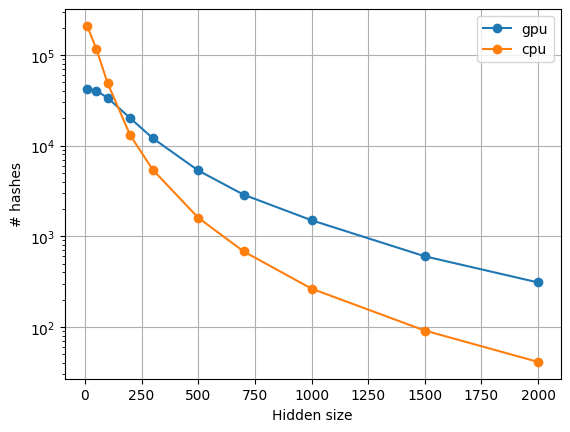

In [51]:
plt.plot(hs, np.array(results['gpu']), 'o-', label='gpu')
plt.plot(hs, np.array(results['cpu']), 'o-', label='cpu')
plt.ylabel('# hashes')
plt.xlabel('Hidden size')
plt.yscale('log')
plt.legend()
plt.grid('both')
1